https://stackoverflow.com/questions/28342968/how-to-plot-a-2d-gaussian-with-different-sigma

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import multivariate_normal
from sklearn.mixture import GaussianMixture as gmm
from mpl_toolkits.mplot3d import Axes3D

In [2]:
# Data
x = np.linspace(0, 10, 100)
y = np.linspace(10, 20, 100)
X, Y = np.meshgrid(x, y)

In [3]:
# Multivariate Normal
mu_x = np.mean(x)
sigma_x = np.std(x)
mu_y = np.mean(y)
sigma_y = np.std(y)
# https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.multivariate_normal.html
# multivariate_normal(mean, cov), where mean.shape==(2,) and cov.shape==(2,2)
norm = multivariate_normal([mu_x, mu_y], [[sigma_x, 0], [0, sigma_y]])

In [4]:
# Probability Density
pos = np.empty(X.shape + (2,))
pos[:, :, 0] = X
pos[:, :, 1] = Y
data = norm.pdf(pos)

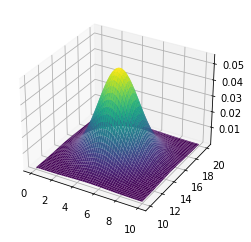

In [5]:
# Plot
fig = plt.figure()
ax = fig.gca(projection='3d')
ax.plot_surface(X, Y, data, cmap='viridis', linewidth=0)
plt.show()

In [6]:
new_data = np.concatenate((X, Y), axis=0)
new_data = new_data.reshape(-1, 1)

In [7]:
k = 2
model = gmm(n_components=k, max_iter=10000, covariance_type='full')
model.fit(new_data)

print(model.means_)
print(np.sqrt(model.covariances_))
print(mu_x, mu_y)
print(sigma_x, sigma_y)

[[14.7726552 ]
 [ 5.12451189]]
[[[3.22703713]]

 [[3.16980297]]]
5.0 15.0
2.9157646512850626 2.9157646512850626
